# Entregável 1 - visão computacional

In [10]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.2.0 


# Equalização de histograma

In [24]:
rintin = cv2.imread("RinTinTin.jpg")

In [25]:
rintin.shape

(240L, 320L, 3L)

In [26]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [27]:
rintin_gray.shape

(240L, 320L)

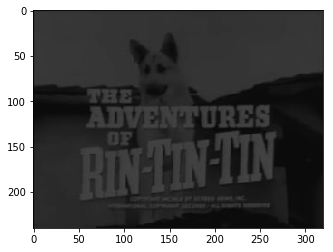

In [28]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

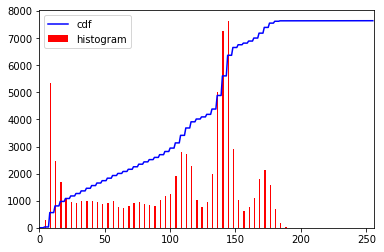

In [39]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico

3. Plote a imagem desenhada

In [41]:
import random

maxim = 0
minim = 255

for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        if rintin_gray[i][j] >= maxim:
            maxim = rintin_gray[i][j]
        if rintin_gray[i][j] <= minim:
            minim = rintin_gray[i][j]
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        rintin_gray[i][j] -= minim
        rintin_gray[i][j] *= 255/(maxim-minim)

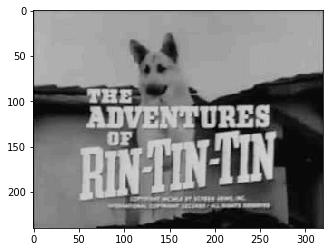

In [42]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [66]:
box= cv2.imread("hall_box_battery1.jpg")

In [67]:
graybox=box


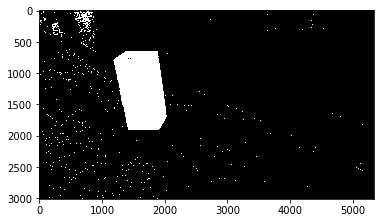

In [68]:
for i in range(box.shape[0]):
    for j in range(box.shape[1]):
        if box[i][j][2]>=150 and box[i][j][0]<=150 and box[i][j][1]<=150:
            graybox[i][j] = 255
        else:
            graybox[i][j] = 0
plt.imshow(graybox, cmap="Greys_r", vmin=0, vmax=255)